https://www.runoob.com/python3/python-qt.html

In [2]:
import yfinance as yf

# 获取股票数据
symbol = "600519.SS"
start_date = "2022-01-01"
end_date = "2023-01-01"

data = yf.download(symbol, start=start_date, end=end_date)
print(data.head())

[*********************100%***********************]  1 of 1 completed

                  Open         High          Low        Close    Adj Close  \
Date                                                                         
2022-01-04  2055.00000  2068.949951  2014.000000  2051.229980  1911.405396   
2022-01-05  2045.00000  2065.000000  2018.000000  2024.000000  1886.031616   
2022-01-06  2022.01001  2036.000000  1938.510010  1982.219971  1847.099487   
2022-01-07  1975.00000  1988.880005  1939.319946  1942.000000  1809.621338   
2022-01-10  1928.01001  1977.000000  1917.550049  1966.000000  1831.985229   

             Volume  
Date                 
2022-01-04  3384262  
2022-01-05  2839551  
2022-01-06  5179475  
2022-01-07  2981669  
2022-01-10  2962670  


# 简单的数据分析和可视化
使用 pandas 进行数据分析和 matplotlib 进行可视化：

[*********************100%***********************]  1 of 1 completed


              Open         High          Low        Close    Adj Close  \
count   242.000000   242.000000   242.000000   242.000000   242.000000   
mean   1798.663387  1820.485125  1777.270868  1797.874382  1684.934010   
std     143.731246   140.473200   144.426160   142.394928   132.168273   
min    1350.000000  1382.010010  1333.000000  1350.000000  1271.552368   
25%    1729.954956  1755.500000  1708.000000  1732.609985  1632.617004   
50%    1808.000000  1833.494995  1788.250000  1806.929993  1683.891846   
75%    1899.654999  1911.869995  1878.097473  1894.752502  1777.968933   
max    2055.000000  2077.000000  2018.000000  2051.229980  1926.166504   

             Volume  
count  2.420000e+02  
mean   3.385434e+06  
std    1.778336e+06  
min    1.354417e+06  
25%    2.216221e+06  
50%    2.835084e+06  
75%    3.929750e+06  
max    1.320980e+07  


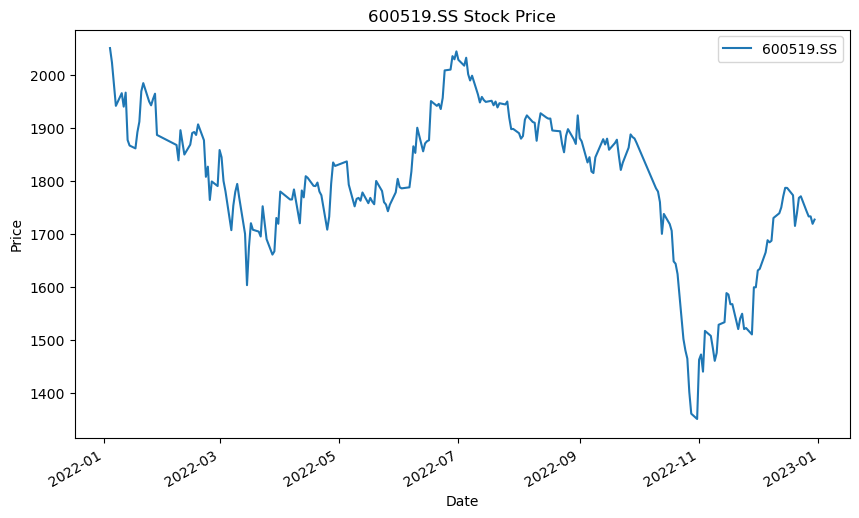

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 获取股票数据
symbol = "600519.SS"
start_date = "2022-01-01"
end_date = "2023-01-01"

data = yf.download(symbol, start=start_date, end=end_date)
# 简单的数据分析
print(data.describe())

# 绘制股价走势图
data['Close'].plot(figsize=(10, 6), label=symbol)
plt.title(f"{symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# 移动平均交叉策略回测
回测是在历史市场数据上模拟和评估一个交易策略的过程。

以下是一个简单的移动平均交叉策略回测的实例代码，策略是在 50 日均线上穿越 200 日均线时买入，下穿越时卖出，策略的表现输出了总收益、年化收益和最大回撤等指标。

[*********************100%***********************]  1 of 1 completed


策略表现:
Total Return: -0.6050
Annualized Return: -0.3829
Max Drawdown: -0.6276


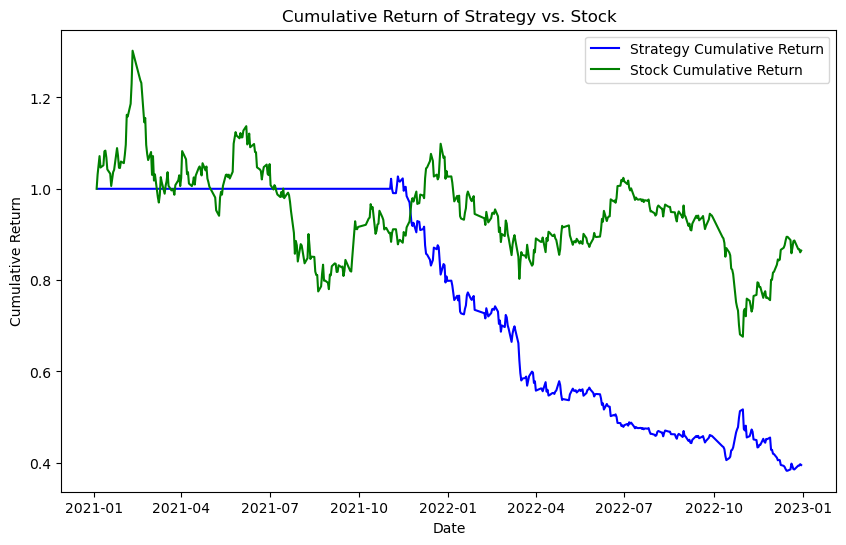

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 获取股票数据
symbol = "600519.SS"
start_date = "2021-01-01"
end_date = "2023-01-01"

data = yf.download(symbol, start=start_date, end=end_date)

# 计算移动平均
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# 初始化交叉信号列
data['Signal'] = 0

# 计算交叉信号
data.loc[data['SMA_50'] > data['SMA_200'], 'Signal'] = 1
data.loc[data['SMA_50'] < data['SMA_200'], 'Signal'] = -1

# 计算每日收益率
data['Daily_Return'] = data['Close'].pct_change()

# 计算策略信号的收益率（shift(1) 是为了避免未来数据的偏差）
data['Strategy_Return'] = data['Signal'].shift(1) * data['Daily_Return']

# 计算累计收益
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

# 输出策略表现
strategy_performance = {
    'Total Return': data['Cumulative_Return'].iloc[-1] - 1,
    'Annualized Return': (data['Cumulative_Return'].iloc[-1] ** (252 / len(data))) - 1,
    'Max Drawdown': (data['Cumulative_Return'] / data['Cumulative_Return'].cummax() - 1).min(),
}

print("策略表现:")
for key, value in strategy_performance.items():
    print(f"{key}: {value:.4f}")

# 绘制累计收益曲线
plt.figure(figsize=(10, 6))
plt.plot(data['Cumulative_Return'], label='Strategy Cumulative Return', color='b')
plt.plot(data['Close'] / data['Close'].iloc[0], label='Stock Cumulative Return', color='g')
plt.title("Cumulative Return of Strategy vs. Stock")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()